# Funkcje skrótu - sprawozdanie
#### Alicja Lis, 151569

## Program analizujący długość znaków oraz szybkość algorytmów md5, sha1, sha224, sha384, sha512

In [ ]:
import hashlib
import time
def compare_hashes(file_path, algorithm, num_measurements=5):
    total_elapsed_time = 0
    for _ in range(num_measurements):
        start_time = time.time()
        with open(file_path, 'rb') as file:
            file_content = file.read()
            if algorithm == 'md5':
                hash_value = hashlib.md5(file_content).hexdigest()
            elif algorithm == 'sha1':
                hash_value = hashlib.sha1(file_content).hexdigest()
            elif algorithm == 'sha224':
                hash_value = hashlib.sha224(file_content).hexdigest()
            elif algorithm == 'sha256':
                hash_value = hashlib.sha256(file_content).hexdigest()
            elif algorithm == 'sha384':
                hash_value = hashlib.sha384(file_content).hexdigest()
            elif algorithm == 'sha512':
                hash_value = hashlib.sha512(file_content).hexdigest()
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_elapsed_time += elapsed_time
    average_elapsed_time = total_elapsed_time / num_measurements
    return hash_value, average_elapsed_time

file_paths = ["text_1MB.txt", "text_3MB.txt", "text_10MB.txt"]
algorithms = ['md5', 'sha1', 'sha224', 'sha256', 'sha384', 'sha512']
num_measurements = 5

total_times = {algorithm: 0 for algorithm in algorithms}

for file_path in file_paths:
    print(f"Testing for file: {file_path}")
    for algorithm in algorithms:
        _, average_elapsed_time = compare_hashes(file_path, algorithm, num_measurements)
        print(f"{algorithm}, Average Time: {average_elapsed_time:.6f} seconds")
        total_times[algorithm] += average_elapsed_time
    print()

print("Total times for each algorithm:")
for algorithm, total_time in total_times.items():
    print(f"{algorithm}, Total Time: {total_time:.6f} seconds")


## Wyniki funkcji skrótów

### Plik o wielkości 1MB
|      | MD5    | SHA-1  | SHA-224 | SHA-256 | SHA-384  | SHA-512  |
|:----:|:------:|--------|---------|---------|----------|----------|
| Czas | 0.0024 | 0.0012 | 0.0012  | 0.0014  | 0.002609 | 0.002801 |

### Plik o wielkości 3MB
|      |   MD5   | SHA-1  | SHA-224 | SHA-256   | SHA-384 | SHA-512  |
|:----:|:-------:|--------|---------|-----------|---------|----------|
| Czas |0.007591 | 0.0042 | 0.0044  | 0.004467  | 0.0086  | 0.008411 |

### Plik o wielkości 10MB
|      |   MD5   | SHA-1     | SHA-224 | SHA-256   | SHA-384   | SHA-512 |
|:----:|:-------:|-----------|---------|-----------|-----------|---------|
| Czas |0.023046 | 0.013448  |0.014817 | 0.015001  | 0.029704  | 0.0276  |

## Ranking szybkości funkcji skrótu na podstawie sum poszczególnych wyników
|      |   MD5   | SHA-1     | SHA-224 | SHA-256   | SHA-384   | SHA-512   |
|:----:|:-------:|-----------|---------|-----------|-----------|-----------|
| Czas |0.033036 | 0.018847  |0.020418 | 0.020868  | 0.040913  | 0.038812  |

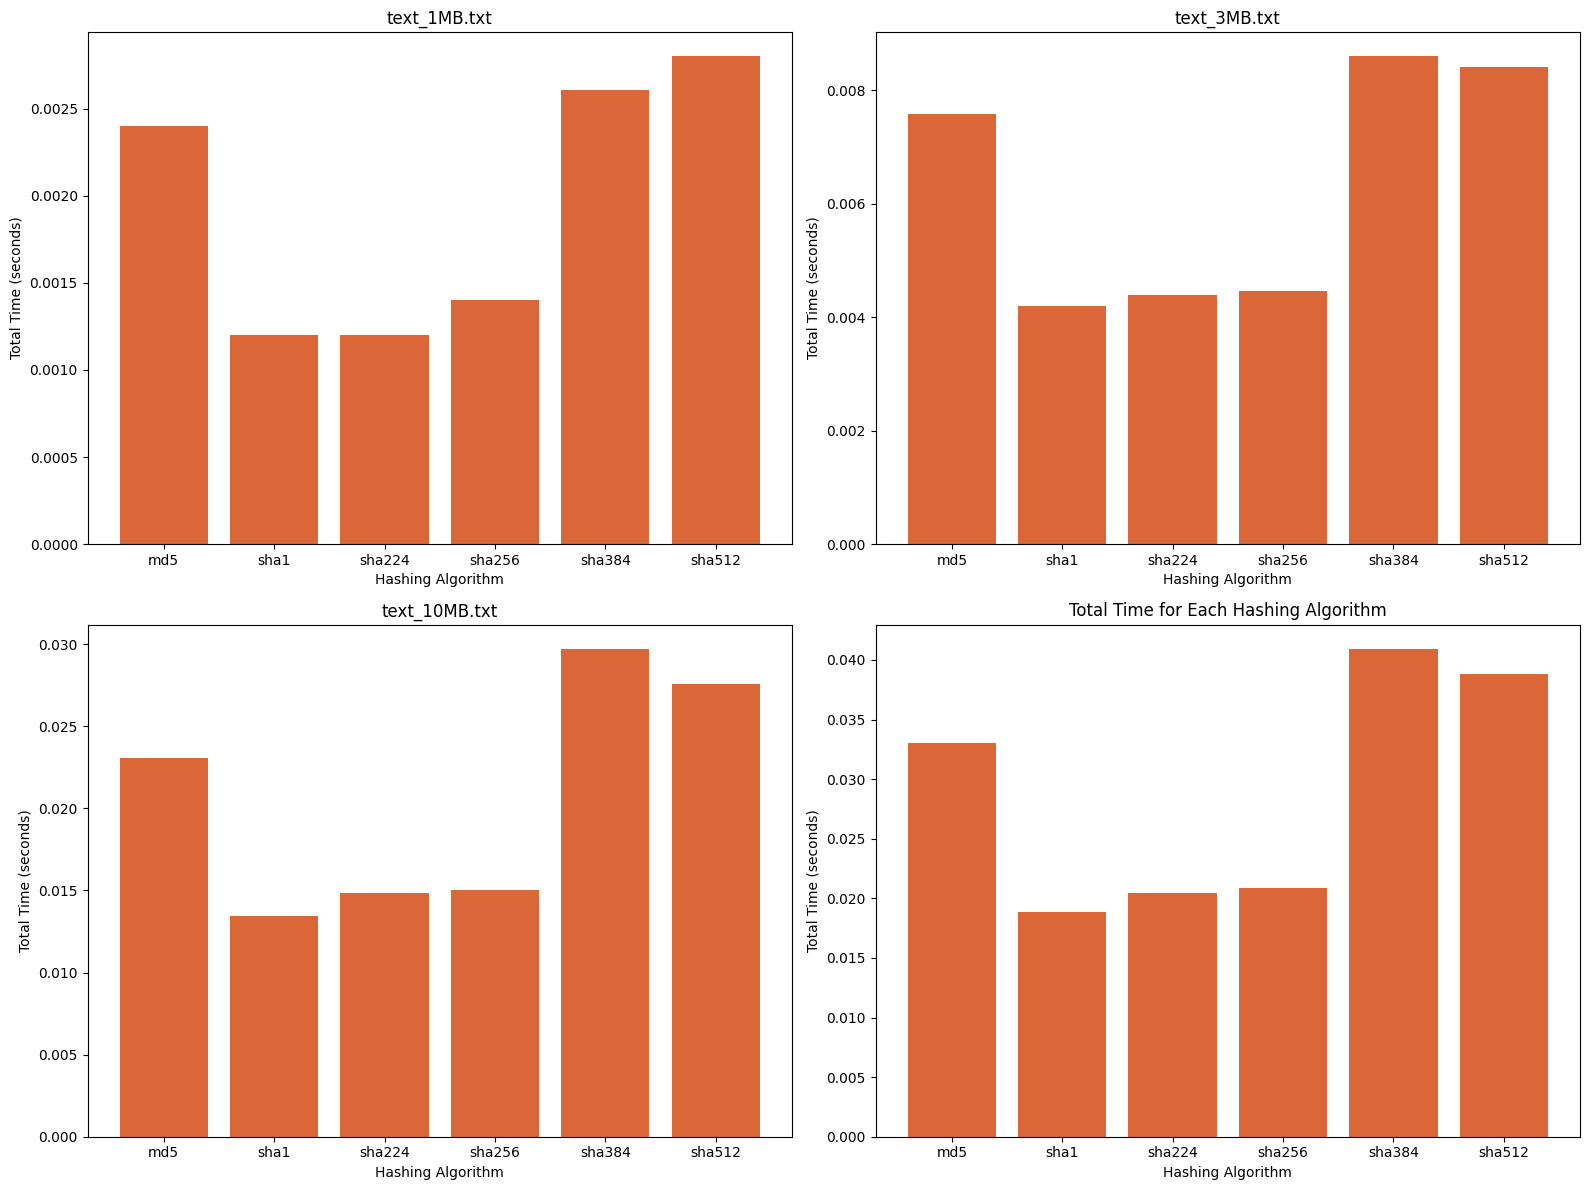

In [2]:
import matplotlib.pyplot as plt

file_paths = ["text_1MB.txt", "text_3MB.txt", "text_10MB.txt"]
algorithms = ['md5', 'sha1', 'sha224', 'sha256', 'sha384', 'sha512']

total_algorithms = ['md5', 'sha1', 'sha224', 'sha256', 'sha384', 'sha512']
total_times = [0.033036, 0.018847, 0.020418, 0.020868, 0.040913, 0.038812]

file_data = {
    "text_1MB.txt": {
        'md5': 0.002400,
        'sha1': 0.001200,
        'sha224': 0.001200,
        'sha256': 0.001400,
        'sha384': 0.002609,
        'sha512': 0.002801
    },
    "text_3MB.txt": {
        'md5': 0.007591,
        'sha1': 0.004200,
        'sha224': 0.004400,
        'sha256': 0.004467,
        'sha384': 0.008600,
        'sha512': 0.008411
    },
    "text_10MB.txt": {
        'md5': 0.023046,
        'sha1': 0.013448,
        'sha224': 0.014817,
        'sha256': 0.015001,
        'sha384': 0.029704,
        'sha512': 0.027600
    }
}

plt.figure(figsize=(16, 12))

# Wykresy dla poszczególnych plików
for i, file_path in enumerate(file_paths, start=1):
    plt.subplot(2, 2, i)
    plt.bar(algorithms, [file_data[file_path][alg] for alg in algorithms], color='#db6739')
    plt.title(f'{file_path}')
    plt.xlabel('Hashing Algorithm')
    plt.ylabel('Total Time (seconds)')

# Wykres dla sumarycznych wartości
plt.subplot(2, 2, 4)
plt.bar(total_algorithms, total_times, color='#db6739')
plt.title('Total Time for Each Hashing Algorithm')
plt.xlabel('Hashing Algorithm')
plt.ylabel('Total Time (seconds)')

plt.tight_layout()
plt.show()

## Wnioski
Algorytm SHA-1 okazał się być najszybszym algorytmem szyfrowania zarówno w tekstach długich jak i krótkich. Najbardziej efektywne pod względem czasu są funkcje skrótu SHA-1, SHA-256 i SHA-224, które osiągnęły najniższe czasy wykonania. Z kolei MD5, SHA-384 i SHA-512 są wolniejsze, co może wynikać z większej złożoności obliczeniowej tych funkcji.

# Rola soli w tworzeniu skrótów
- **Unikalność skrótu**
Dodanie soli do oryginalnych danych powoduje, że dwa identyczne ciągi danych mogą generować różne skróty. Jest to szczególnie istotne w przypadku haseł, gdzie istnieje ryzyko ataków z wykorzystaniem rainbow table.

- **Odporność na ataki brute-force**
Sól zwiększa złożoność obliczeniową ataków brute-force. Bez soli, atakujący może obliczyć skróty dla wielu potencjalnych haseł i porównać je z zapisanymi skrótami w bazie danych. Dodając sól, każde obliczenie skrótu wymagałoby dodatkowej pracy.

- **Odporność na ataki słownikowe**
Sól utrudnia również ataki oparte na słownikach. Bez soli, można użyć gotowych list haseł i sprawdzić, czy ich skróty znajdują się w bazie danych. Sól sprawia, że taka technika jest mniej skuteczna, ponieważ nawet popularne hasła będą miały różne skróty.

- **Bezpieczeństwo w przypadku przecieku bazy danych**
Nawet jeśli baza danych zawierająca skróty danych i soli zostanie złamana, dodanie soli sprawia, że trzeba wykonać osobne obliczenia dla każdego hasła co zwiększa koszty obliczeniowe ataku.


# Czy funkcję MD5 można uznać za bezpieczną?
MD5, jest uważana za niebezpieczną z powodu swoich słabych właściwości kryptograficznych. Znane są ataki na MD5, które umożliwiają generowanie kolizji, czyli znalezienie dwóch różnych komunikatów, które mają taki sam skrót MD5. Przez lata wykazano, że możliwe jest stworzenie dwóch różnych wiadomości, które generują ten sam skrót MD5.
W 2004 roku grupa badaczy ogłosiła, że znaleźli praktyczny sposób na wygenerowanie kolizji MD5. W latach późniejszych udowodniono tę koncepcję poprzez tworzenie konkretnych kolizji. MD5 nie powinno się już stosować w zastosowaniach, które wymagają bezpiecznych funkcji skrótu.

## Bezpieczeństwo skrótów z krótkich haseł składowanych w bazach danych
Składowanie krótkich haseł w bazach danych jest bardzo niebezpieczne i ma bardzo duże ryzyko odgadnięcia. Krótkie hasła są bardziej podatne na ataki brute force, mają mniejszą entropię oraz większe prawdopodobieństwo wystąpienia w rainbow table. Wzrasta też ryzyko ich kolizji. Wygenerowany skrót czteroznakowy został bardzo szybko odgadnięty poprzez stronę online.


## Badanie kolizji MD5 na pierwszych 12 bitach

In [ ]:
import hashlib

def find_collisions():
    # słownik który będzie przechowywał skróty MD5 dla różnych tekstów
    hash_map = {}
    collision_count = 0

    # zakres od 0 do 2^12, czyli możliwe kombinacje pierwszych 12 bitów
    for i in range(2**12):
        # Tworzenie tekstu na podstawie numeru w zakresie
        text = str(i)
        md5_hash = hashlib.md5(text.encode()).hexdigest()
        first_12_bits = md5_hash[:3]  # Pierwsze 3 znaki reprezentujące 12 bitów
        if first_12_bits in hash_map:
            collision_count += 1

            # print("Collision found for first 12 bits:", first_12_bits)
            # print("Text 1:", hash_map[first_12_bits])
            # print("Text 2:", text)
            # print()
        else:
            hash_map[first_12_bits] = text

    print("Total collisions: ", collision_count)

if __name__ == "__main__":
    find_collisions()



W pierwszych 12 bitach znaleziono 1479 kolizji, co bardzo dobrze komentuje bezpieczeństwo funkcji skrótu MD5. Funkcja skrótu, która dla kilku wiadomości generuje tą samą funkcję skrótu nie jest bezpieczna.

### Badanie losowości wyjścia funkcji skrótu kryterium SAC

In [ ]:
import hashlib

def bit_change_test(input_data):
    original_hash = hashlib.sha256(input_data.encode()).digest()
    changed_hashes = []
    for i in range(len(input_data) * 8):  # dla każdego bitu w wejściu
        modified_input = bytearray(input_data.encode())
        byte_index = i // 8
        bit_index = i % 8
        modified_input[byte_index] ^= (1 << bit_index)  # zmiana pojedynczego bitu
        changed_hash = hashlib.sha256(modified_input).digest()
        changed_hashes.append(changed_hash)

    return all(bit != original_hash[i] for changed_hash in changed_hashes for i, bit in enumerate(changed_hash))

if __name__ == "__main__":
    input_data = "Lorem ipsum dolor sit amet, consectetur adipiscing elit."
    result = bit_change_test(input_data)
    if result:
        print("SHA-256 spełnia kryterium SAC")
    else:
        print("SHA-256 nie spełnia kryterium SAC")
